In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [94]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (15, 12)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [95]:
current_dir = os.getcwd()
print(f"Current directory : {current_dir}")

Current directory : c:\Users\Dell\OneDrive\Desktop\Project_CLV\notebooks


In [96]:
try:
    csv_path = 'data/customers_data.csv'
    df = pd.read_csv(csv_path)
    print(f"✓ Successfully loaded from: {csv_path}")
except FileNotFoundError:
    # If not found, try parent directory
    csv_path = '../data/customers_data.csv'
    df = pd.read_csv(csv_path)
    print(f"✓ Successfully loaded from: {csv_path}")


✓ Successfully loaded from: ../data/customers_data.csv


In [97]:
print(f"Loaded {len(df)} records")
print(f" Shape: {df.shape}")

Loaded 36400 records
 Shape: (36400, 11)


In [98]:
print(df.dtypes)

customer_id                object
age                       float64
gender                     object
registration_date          object
purchase_frequency          int64
avg_order_value           float64
total_spending            float64
last_purchase_date         object
product_category           object
num_orders                float64
customer_lifetime_days      int64
dtype: object


In [99]:
print(df.isnull().sum())

customer_id                 0
age                       370
gender                    366
registration_date           0
purchase_frequency          0
avg_order_value             0
total_spending              0
last_purchase_date        358
product_category            0
num_orders                365
customer_lifetime_days      0
dtype: int64


In [100]:
df.duplicated().sum()

np.int64(1318)

In [101]:
null_counts = df.isnull().sum()
print(null_counts[null_counts>0])

age                   370
gender                366
last_purchase_date    358
num_orders            365
dtype: int64


In [102]:
df.isnull().sum().sum()

np.int64(1459)

In [103]:
df.duplicated().sum()

np.int64(1318)

In [104]:
#duplicate by customer id
df.duplicated(subset=['customer_id']).sum()

np.int64(1400)

In [105]:
df.head(5)

,customer_id,age,gender,registration_date,purchase_frequency,avg_order_value,total_spending,last_purchase_date,product_category,num_orders,customer_lifetime_days
0,CUST_00001,24.0,Other,2025-02-01,45,328.112355,9763.185674,2028-04-25,Clothing,140.0,198
1,CUST_00002,45.0,Male,2027-03-25,45,539.434321,91.769749,2028-02-22,Beauty,21.0,955
2,CUST_00003,25.0,Other,2025-12-26,18,382.447543,3716.627338,2025-11-23,Home,72.0,512
3,CUST_00004,55.0,Other,2025-10-12,21,164.571963,9044.465023,2026-02-01,Beauty,66.0,570
4,CUST_00005,74.0,Female,2027-03-11,10,28.846476,6506.907976,2026-09-01,Home,84.0,313


In [106]:
df_clean=df.copy()

In [107]:
#remove duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['customer_id'],keep='first')
removed_dups = initial_rows-len(df_clean)
print({removed_dups})

{1400}


In [108]:
#remove rows with NULL values
initial_rows=len(df_clean)
df_clean = df_clean.dropna()
removed_nulls = initial_rows-len(df_clean)
print({removed_nulls})

{1376}


In [109]:
#remove rows with negative values
df_clean = df_clean[(df_clean['purchase_frequency']>0) & 
                    (df_clean['avg_order_value'] > 0) & 
                     (df_clean['total_spending'] > 0) &
                     (df_clean['num_orders'] > 0) &
                     (df_clean['customer_lifetime_days'] > 0)]
removed_negatives = initial_rows-len(df_clean)
print({removed_negatives})


{1709}


In [110]:
#remove outliers
for col in ['avg_order_value','total_spending','num_orders']:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3*iqr
    upper_bound = q3 + 3*iqr
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

removed_outliers = initial_rows-len(df_clean)
print({removed_outliers})

{2037}


In [111]:
initial_rows = len(df_clean)
df_clean['registration_date'] = pd.to_datetime(df_clean['registration_date'])
df_clean['last_purchase_date'] = pd.to_datetime(df_clean['last_purchase_date'])
df_clean = df_clean[df_clean['last_purchase_date'] >= df_clean['registration_date']]
removed_dates = initial_rows-len(df_clean)
print({removed_dates})


{15885}


In [112]:
#reset index
df_clean = df_clean.reset_index(drop=True)


In [113]:
print(len(df_clean))

17078


In [114]:
print(df_clean.shape)
print(len(df_clean))
print(df_clean.isnull().sum().sum())
print(df_clean.duplicated().sum())

(17078, 11)
17078
0
0


In [115]:
print(df_clean.describe())

                age              registration_date  purchase_frequency  \
count  17078.000000                          17078        17078.000000   
mean      46.224558  2026-04-30 20:29:22.267244544           25.010130   
min       18.000000            2025-01-01 00:00:00            1.000000   
25%       32.000000            2025-07-13 00:00:00           13.000000   
50%       46.000000            2026-03-06 00:00:00           25.000000   
75%       60.000000            2026-12-30 00:00:00           37.000000   
max       74.000000            2028-10-31 00:00:00           49.000000   
std       16.384185                            NaN           14.216377   

       avg_order_value  total_spending             last_purchase_date  \
count     17078.000000    17078.000000                          17078   
mean        505.472929     7516.387344  2027-08-30 20:57:26.961002240   
min           5.065735       21.487404            2025-01-01 00:00:00   
25%         256.070808     3743.867778   

In [116]:
df_clean.head(5)

,customer_id,age,gender,registration_date,purchase_frequency,avg_order_value,total_spending,last_purchase_date,product_category,num_orders,customer_lifetime_days
0,CUST_00001,24.0,Other,2025-02-01,45,328.112355,9763.185674,2028-04-25,Clothing,140.0,198
1,CUST_00002,45.0,Male,2027-03-25,45,539.434321,91.769749,2028-02-22,Beauty,21.0,955
2,CUST_00004,55.0,Other,2025-10-12,21,164.571963,9044.465023,2026-02-01,Beauty,66.0,570
3,CUST_00006,74.0,Other,2027-04-21,36,648.384429,9015.458074,2028-03-23,Sports,65.0,1271
4,CUST_00007,68.0,Male,2025-07-28,34,320.594543,768.975200,2026-03-15,Electronics,20.0,109


In [117]:
print(f"   Total customers: {len(df_clean)}")
print(f"   Average age: {df_clean['age'].mean():.2f} years")
print(f"   Age range: {df_clean['age'].min()} - {df_clean['age'].max()} years")
print(f"\n   Gender distribution:")
print(df_clean['gender'].value_counts())

   Total customers: 17078
   Average age: 46.22 years
   Age range: 18.0 - 74.0 years

   Gender distribution:
gender
Female    5713
Male      5691
Other     5674
Name: count, dtype: int64


In [118]:
print(f"   Average total spending: ${df_clean['total_spending'].mean():.2f}")
print(f"   Median total spending: ${df_clean['total_spending'].median():.2f}")
print(f"   Min-Max: ${df_clean['total_spending'].min():.2f} - ${df_clean['total_spending'].max():.2f}")
print(f"   Average order value: ${df_clean['avg_order_value'].mean():.2f}")

   Average total spending: $7516.39
   Median total spending: $7549.68
   Min-Max: $21.49 - $14999.15
   Average order value: $505.47


In [119]:
print(f"   Average purchase frequency: {df_clean['purchase_frequency'].mean():.2f}")
print(f"   Average number of orders: {df_clean['num_orders'].mean():.2f}")
print(f"   Average customer lifetime: {df_clean['customer_lifetime_days'].mean():.2f} days")


   Average purchase frequency: 25.01
   Average number of orders: 74.46
   Average customer lifetime: 702.07 days


In [120]:
print(df_clean['product_category'].value_counts())

product_category
Sports         3494
Home           3447
Electronics    3398
Clothing       3378
Beauty         3361
Name: count, dtype: int64


In [121]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

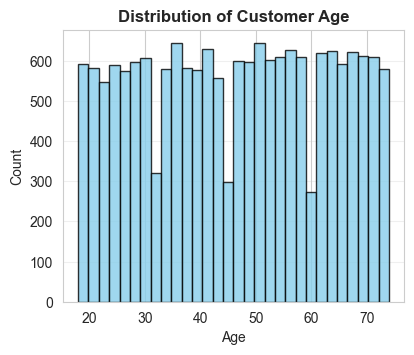

In [122]:
# 1. Age distribution
ax1 = plt.subplot(3, 3, 1)
plt.hist(df_clean['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Customer Age', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

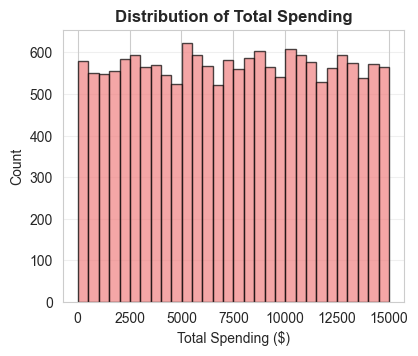

In [123]:

# 2. Total spending distribution
ax2 = plt.subplot(3, 3, 2)
plt.hist(df_clean['total_spending'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel('Total Spending ($)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Total Spending', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

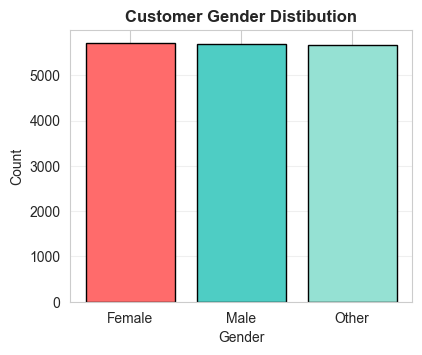

In [124]:
ax3 = plt.subplot(3,3,3)
gender_counts = df_clean['gender'].value_counts()
plt.bar(gender_counts.index,gender_counts.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'], edgecolor='black')
plt.xlabel('Gender',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Customer Gender Distibution',fontsize=12,fontweight='bold')
plt.grid(axis='y',alpha=0.3)

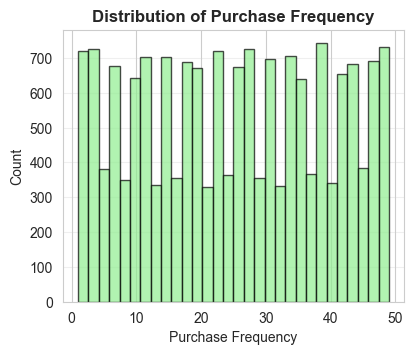

In [125]:
# 4. Purchase frequency distribution
ax4 = plt.subplot(3, 3, 4)
plt.hist(df_clean['purchase_frequency'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Purchase Frequency', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Purchase Frequency', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

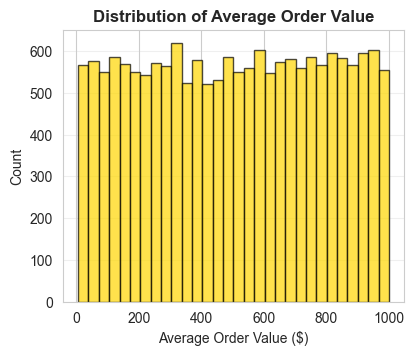

In [126]:
# 5. Average order value distribution
ax5 = plt.subplot(3, 3, 5)
plt.hist(df_clean['avg_order_value'], bins=30, color='gold', edgecolor='black', alpha=0.7)
plt.xlabel('Average Order Value ($)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Average Order Value', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

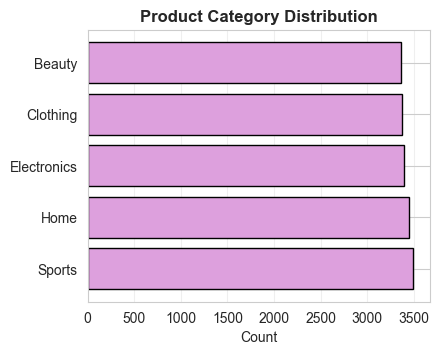

In [127]:
# 6. Product category distribution
ax6 = plt.subplot(3, 3, 6)
category_counts = df_clean['product_category'].value_counts()
plt.barh(category_counts.index, category_counts.values, color='plum', edgecolor='black')
plt.xlabel('Count', fontsize=10)
plt.title('Product Category Distribution', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

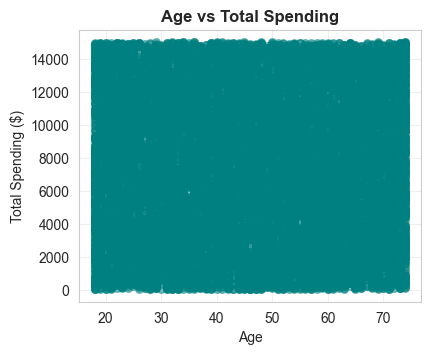

In [128]:

# 7. Age vs Total Spending
ax7 = plt.subplot(3, 3, 7)
plt.scatter(df_clean['age'], df_clean['total_spending'], alpha=0.5, s=30, color='teal')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Total Spending ($)', fontsize=10)
plt.title('Age vs Total Spending', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

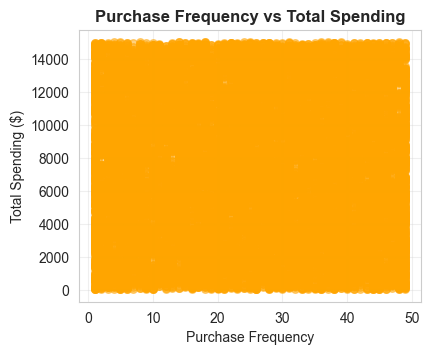

In [129]:
# 8. Purchase Frequency vs Total Spending
ax8 = plt.subplot(3, 3, 8)
plt.scatter(df_clean['purchase_frequency'], df_clean['total_spending'], alpha=0.5, s=30, color='orange')
plt.xlabel('Purchase Frequency', fontsize=10)
plt.ylabel('Total Spending ($)', fontsize=10)
plt.title('Purchase Frequency vs Total Spending', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

Text(0.5, 0.98, '')

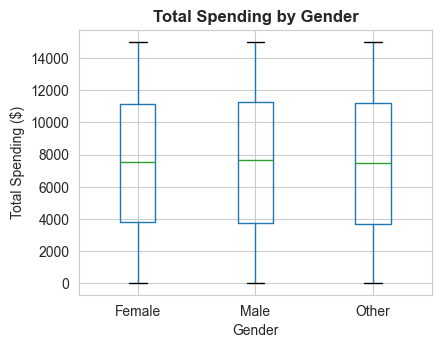

In [130]:
# 9. Box plot: Spending by Gender
ax9 = plt.subplot(3, 3, 9)
df_clean.boxplot(column='total_spending', by='gender', ax=ax9)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Total Spending ($)', fontsize=10)
plt.title('Total Spending by Gender', fontsize=12, fontweight='bold')
plt.suptitle('')

✓ Saved to: ../output/eda_visualizations.png


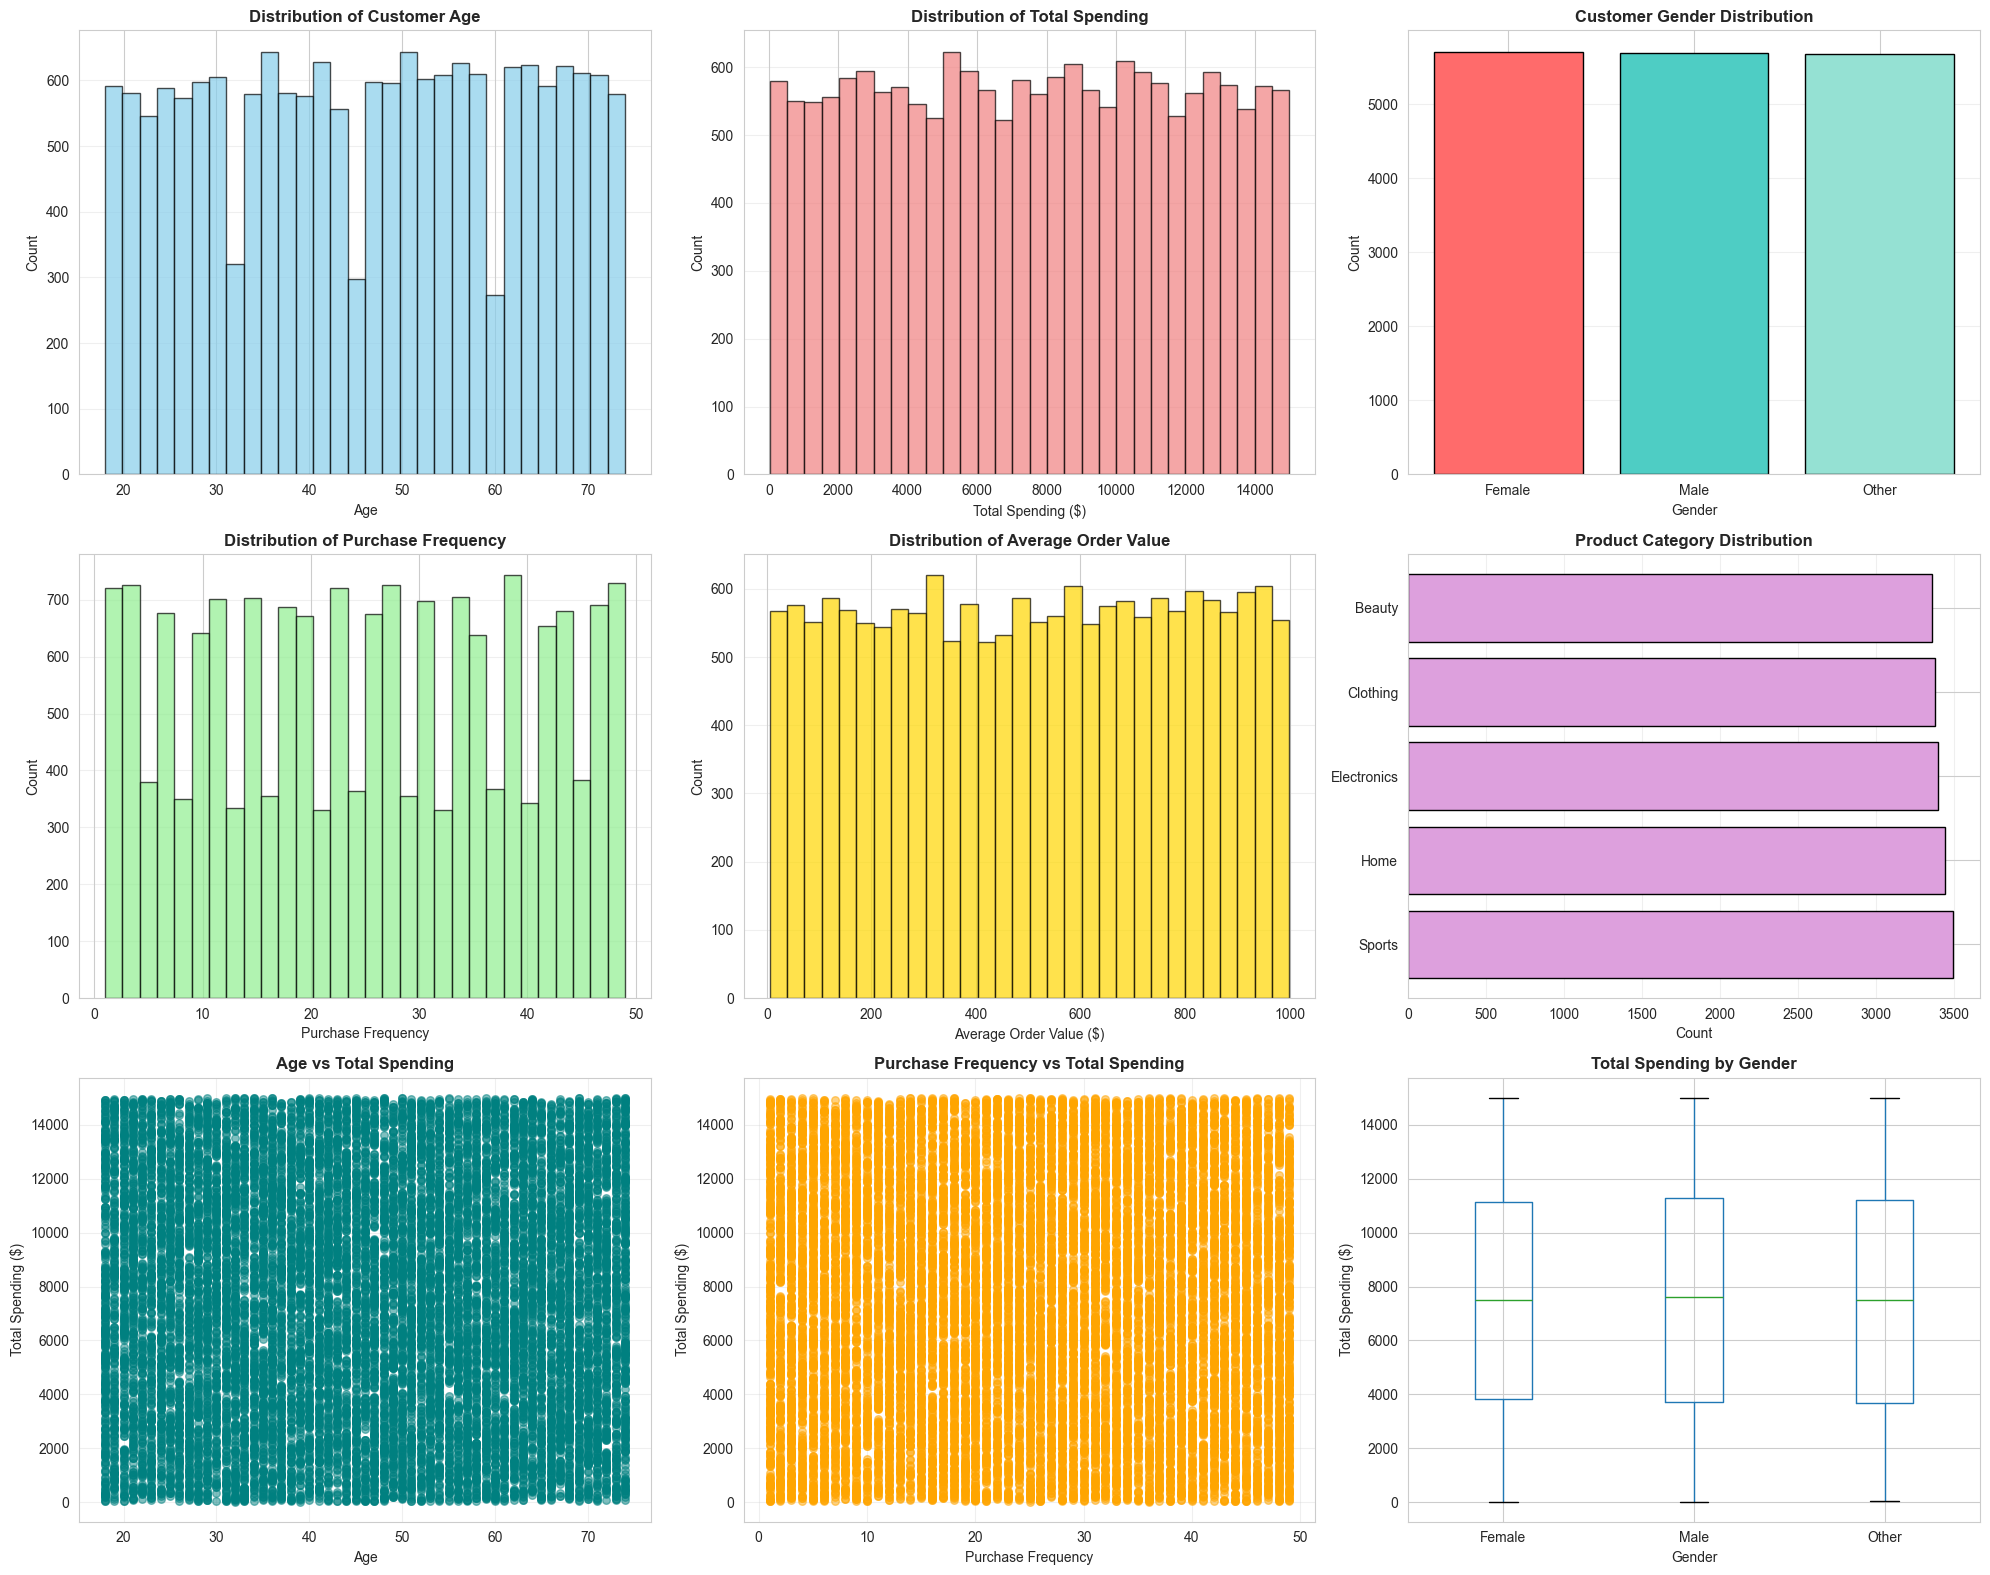

In [131]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Create figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.patch.set_facecolor('white')

# Flatten axes for easier iteration
axes = axes.flatten()

# 1. Age distribution
axes[0].hist(df_clean['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].set_title('Distribution of Customer Age', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# 2. Total spending distribution
axes[1].hist(df_clean['total_spending'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Total Spending ($)', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].set_title('Distribution of Total Spending', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# 3. Gender distribution
gender_counts = df_clean['gender'].value_counts()
axes[2].bar(gender_counts.index, gender_counts.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'], edgecolor='black')
axes[2].set_xlabel('Gender', fontsize=10)
axes[2].set_ylabel('Count', fontsize=10)
axes[2].set_title('Customer Gender Distribution', fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

# 4. Purchase frequency distribution
axes[3].hist(df_clean['purchase_frequency'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[3].set_xlabel('Purchase Frequency', fontsize=10)
axes[3].set_ylabel('Count', fontsize=10)
axes[3].set_title('Distribution of Purchase Frequency', fontsize=12, fontweight='bold')
axes[3].grid(axis='y', alpha=0.3)

# 5. Average order value distribution
axes[4].hist(df_clean['avg_order_value'], bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[4].set_xlabel('Average Order Value ($)', fontsize=10)
axes[4].set_ylabel('Count', fontsize=10)
axes[4].set_title('Distribution of Average Order Value', fontsize=12, fontweight='bold')
axes[4].grid(axis='y', alpha=0.3)

# 6. Product category distribution
category_counts = df_clean['product_category'].value_counts()
axes[5].barh(category_counts.index, category_counts.values, color='plum', edgecolor='black')
axes[5].set_xlabel('Count', fontsize=10)
axes[5].set_title('Product Category Distribution', fontsize=12, fontweight='bold')
axes[5].grid(axis='x', alpha=0.3)

# 7. Age vs Total Spending
axes[6].scatter(df_clean['age'], df_clean['total_spending'], alpha=0.5, s=30, color='teal')
axes[6].set_xlabel('Age', fontsize=10)
axes[6].set_ylabel('Total Spending ($)', fontsize=10)
axes[6].set_title('Age vs Total Spending', fontsize=12, fontweight='bold')
axes[6].grid(alpha=0.3)

# 8. Purchase Frequency vs Total Spending
axes[7].scatter(df_clean['purchase_frequency'], df_clean['total_spending'], alpha=0.5, s=30, color='orange')
axes[7].set_xlabel('Purchase Frequency', fontsize=10)
axes[7].set_ylabel('Total Spending ($)', fontsize=10)
axes[7].set_title('Purchase Frequency vs Total Spending', fontsize=12, fontweight='bold')
axes[7].grid(alpha=0.3)

# 9. Box plot: Spending by Gender
df_clean.boxplot(column='total_spending', by='gender', ax=axes[8])
axes[8].set_xlabel('Gender', fontsize=10)
axes[8].set_ylabel('Total Spending ($)', fontsize=10)
axes[8].set_title('Total Spending by Gender', fontsize=12, fontweight='bold')
plt.suptitle('')

plt.tight_layout()

# Create output folder if not exists
output_dir = '../output' 

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print("✓ Created output folder")

# Phir save karo
plt.savefig(f'{output_dir}/eda_visualizations.png', dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Saved to: {output_dir}/eda_visualizations.png")

In [132]:
#correaltion analysis
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
coorelation_matrix = df_clean[numeric_cols].corr()
print("coorelation matrix")
print(coorelation_matrix)

coorelation matrix
                             age  purchase_frequency  avg_order_value  \
age                     1.000000           -0.005741         0.008731   
purchase_frequency     -0.005741            1.000000        -0.001105   
avg_order_value         0.008731           -0.001105         1.000000   
total_spending         -0.012554           -0.001234        -0.001759   
num_orders             -0.014313            0.004598         0.006798   
customer_lifetime_days  0.000477            0.009466        -0.007832   

                        total_spending  num_orders  customer_lifetime_days  
age                          -0.012554   -0.014313                0.000477  
purchase_frequency           -0.001234    0.004598                0.009466  
avg_order_value              -0.001759    0.006798               -0.007832  
total_spending                1.000000    0.012819               -0.005781  
num_orders                    0.012819    1.000000               -0.004339  
custome

✓ Saved to: ../output/correlation_heatmap.png


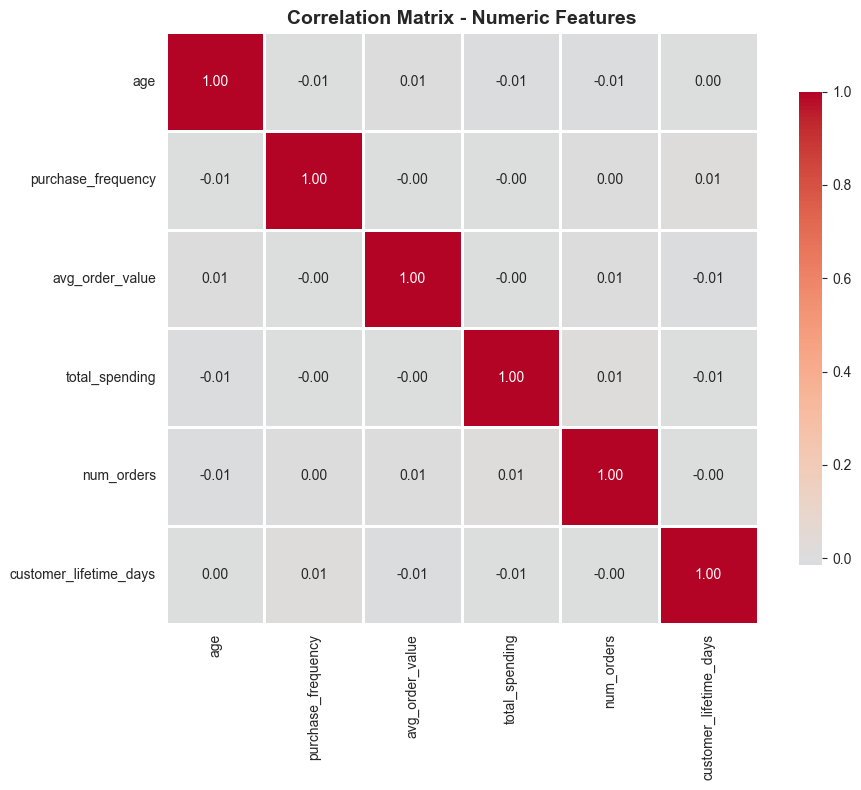

In [133]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(coorelation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{output_dir}/correlation_heatmap.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved to: {output_dir}/correlation_heatmap.png")

In [134]:
# Create cleaned_data folder
cleaned_dir = '../cleaned_data'

if not os.path.exists(cleaned_dir):
    os.makedirs(cleaned_dir)
    print("✓ Created cleaned_data folder")

# Save cleaned data
try:
    cleaned_csv_path = f'{cleaned_dir}/customers_data_cleaned.csv'
    df_clean.to_csv(cleaned_csv_path, index=False)
    print(f"✓ Cleaned dataset saved: {cleaned_csv_path}")
except Exception as e:
    print(f"Error saving file: {e}")

✓ Cleaned dataset saved: ../cleaned_data/customers_data_cleaned.csv
